# Exploratory Modeling

## Import libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.simplefilter('ignore')

## Import Dataset

In [3]:
dataset = pd.read_csv('Data/dogs_intakes_outcomes_clean.csv')

In [4]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

# Explore features

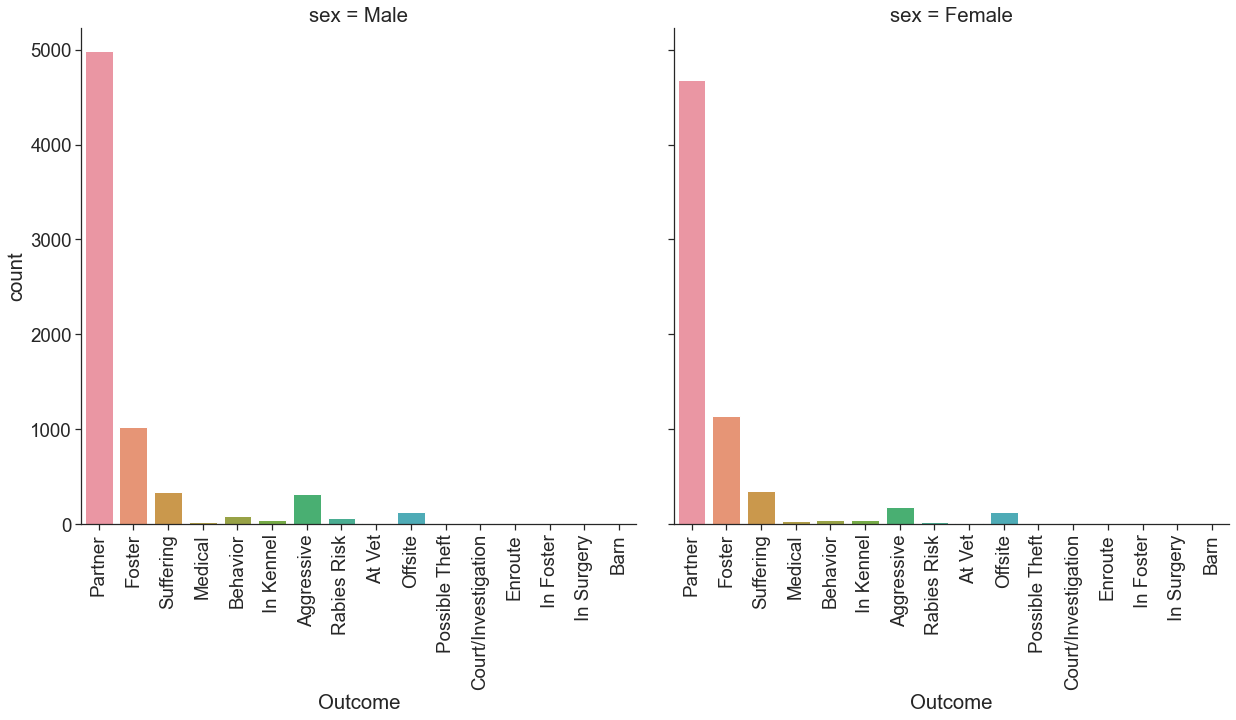

In [5]:
g = sns.factorplot(x='outcome_subtype', col='sex', 
               col_wrap=3, data=dataset, kind='count', size=8.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

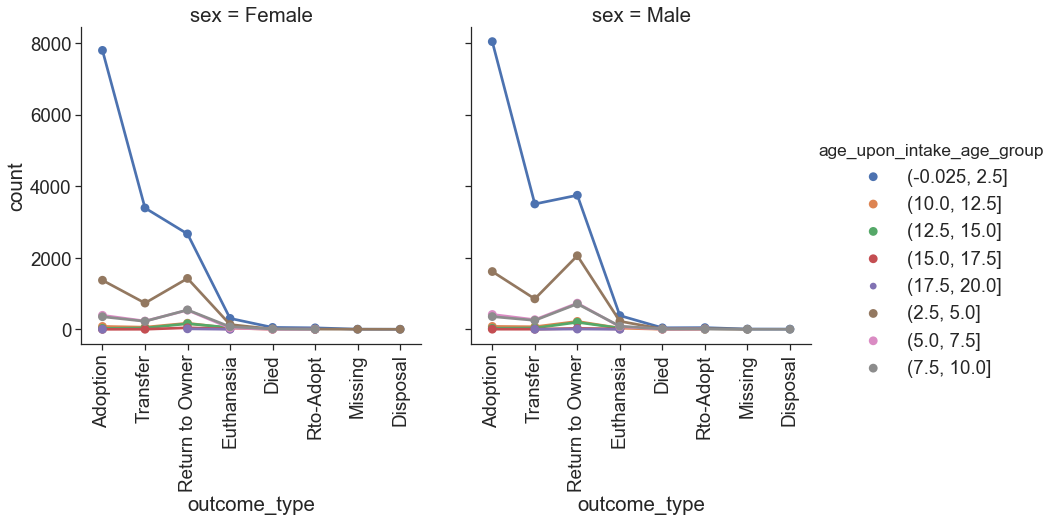

In [6]:
agegroup_counts = dataset.groupby(['age_upon_intake_age_group', 'sex'])['outcome_type'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_type', y='count', hue='age_upon_intake_age_group', col='sex',
                   data=agegroup_counts, size=6)

g.set_xticklabels(rotation=90)

In [7]:
patterns = dataset['coat_pattern'].value_counts()
print(patterns)

age_groups = dataset['age_upon_intake_age_group'].value_counts()
print(age_groups)

condition = dataset['intake_condition'].value_counts()
print(condition)

brindle     2995
tricolor    2443
merle        762
sable        744
tick         300
Name: coat_pattern, dtype: int64
(-0.025, 2.5]    30021
(2.5, 5.0]        8451
(5.0, 7.5]        2701
(7.5, 10.0]       2629
(10.0, 12.5]       759
(12.5, 15.0]       570
(15.0, 17.5]       104
(17.5, 20.0]        26
Name: age_upon_intake_age_group, dtype: int64
Normal      41558
Injured      1793
Sick         1016
Nursing       585
Aged          277
Pregnant       32
Name: intake_condition, dtype: int64


# Feature importance

## Define outcomes and columns

In [8]:
dataset =  dataset.loc[(dataset['outcome_type'] == 'Adoption')                                  
                                 | (dataset['outcome_type'] == 'Transfer')
                                 | (dataset['outcome_type'] == 'Return to Owner')
                                 | (dataset['outcome_type'] == 'Euthanasia')]

x = dataset.filter(items=['sex', 'spay/neuter', 'coat', 'mixed_breed', 'intake_year' 'age_upon_intake_age_group', 
                           'intake_month', 'intake_weekday', 'intake_hour', 'intake_condition', 'intake_type'
                         , 'time_in_shelter_days_12', 'time_in_shelter_days_6', 'Puppy/Dog_intake', 'Bully_breed'])

In [9]:
for col in x:
    x[col] = x[col].astype('category')
    
y = dataset['outcome_subtype'].astype('category')

In [10]:
xd = pd.get_dummies(x)
xnames = xd.columns
xarr = np.array(xd)
yarr, ynames = pd.factorize(dataset['outcome_type'])

## Split x and y arrays into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, 
                                                    test_size=0.3, random_state=1)

## Find most important features with random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

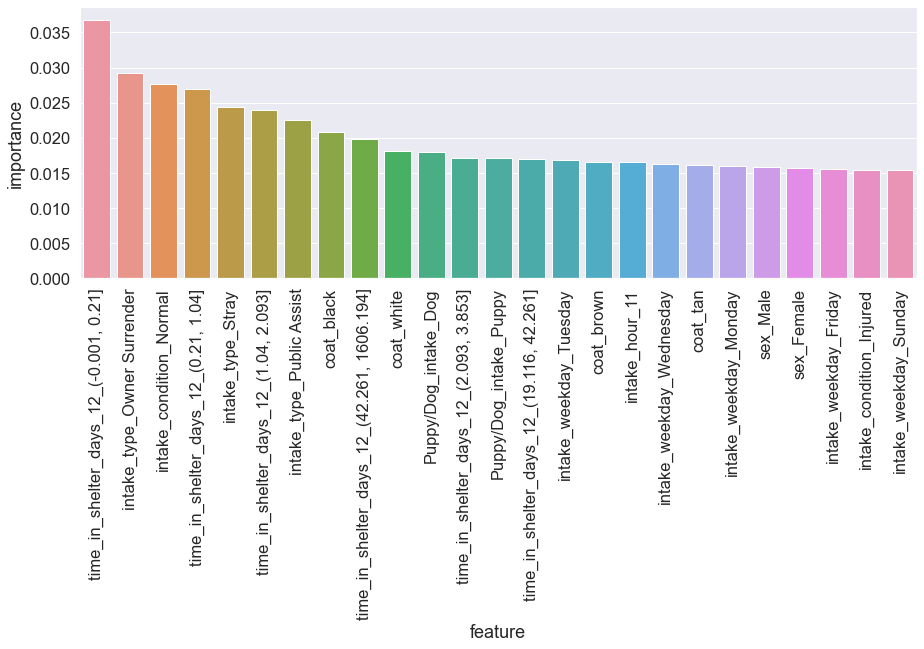

In [13]:
feature_importances = rf_classifier.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:25])

In [14]:

rf_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

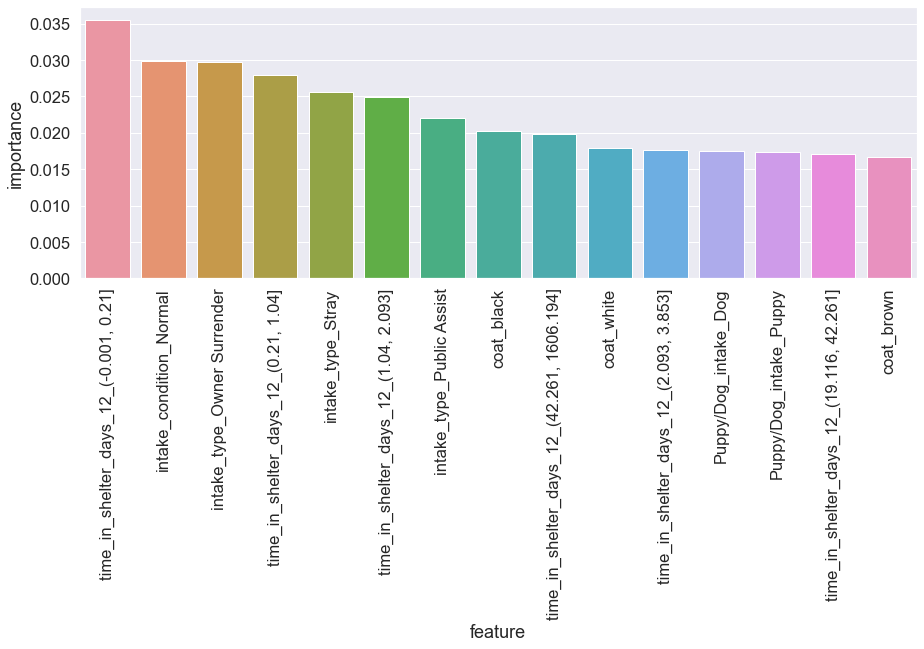

In [15]:
feature_importances = rf_classifier.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15])